# Import Libraries


In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
from scipy.stats import shapiro,kstest,normaltest,skew,zscore

# Problem statement 
> Bangalore House prediction based on the given features


# Data Gathering 


In [50]:
ban_df = pd.read_csv("Bengaluru_House_Data.csv")
ban_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# EDA 

In [51]:
ban_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [52]:
ban_df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [53]:
ban_df.isna().sum() # Checking Null values in each column

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [54]:
# For "Location" column 
ban_df["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [55]:
ban_df["location"].fillna(ban_df["location"].mode()[0],inplace=True) # Replacing null values by mode of the location column
ban_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [56]:
ban_df["location"].mode()[0] # our null value was replaced by 'Whitefield'

'Whitefield'

In [57]:
# For Size Column  
ban_df["size"].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [58]:
ban_df["size"].isna().sum() # Checking Null values for size column

16

In [59]:
ban_df["size"].mode()[0] # Checking the mode of Size column

'2 BHK'

> Replacing the null values by mode of the size column is the best way 

In [60]:
ban_df["size"].fillna(ban_df["size"].mode()[0],inplace=True)
ban_df["size"].isna().sum() # Checking Null values for size column

0

In [61]:
# For Society Column
ban_df["society"].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [62]:
ban_df["society"].isna().sum() # Checking Null values for size column

5502

> We will check how much Society column is affecting the target variable.

<Axes: xlabel='society', ylabel='price'>

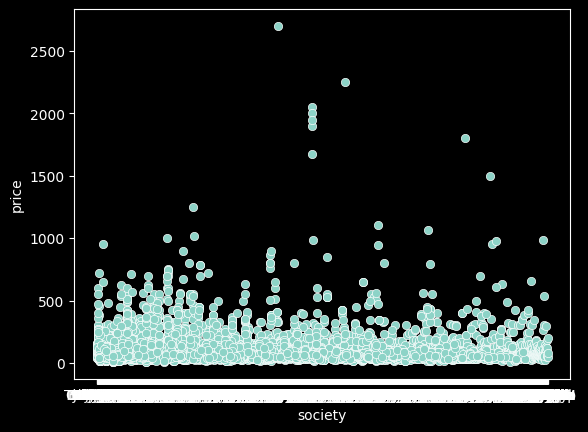

In [63]:
sns.scatterplot(x=ban_df["society"] , y=ban_df["price"])

> As we can see above Society column doenot have a strong linear relationship between the target variable.

In [64]:
# For bath column 
ban_df["bath"].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [65]:
ban_df["bath"].isna().sum() # Checking Null values for bath column

73

In [66]:
ban_df["bath"].mean() # Checking the mean of bath column

2.6926096474673513

In [67]:
ban_df["bath"].median() # Checking the median of bath column >> We can use this in case of outliers 

2.0

In [68]:
ban_df["bath"].sort_values()   # arrange data in ascending order

13319    1.0
6964     1.0
1381     1.0
2755     1.0
6952     1.0
        ... 
11496    NaN
11569    NaN
12768    NaN
12861    NaN
13240    NaN
Name: bath, Length: 13320, dtype: float64

<Axes: xlabel='bath', ylabel='Density'>

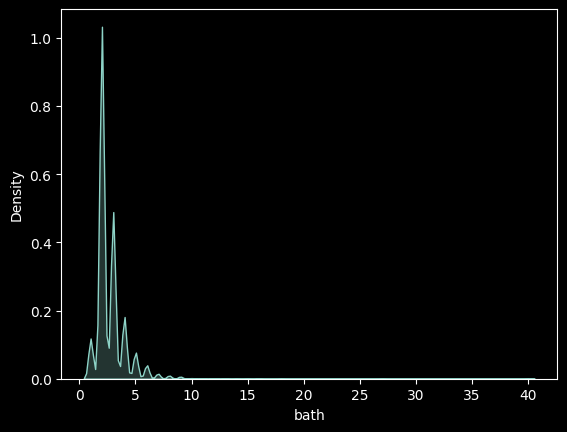

In [69]:
sns.kdeplot(ban_df["bath"],fill=True)   # Checking for distribution of the data

<Axes: xlabel='bath'>

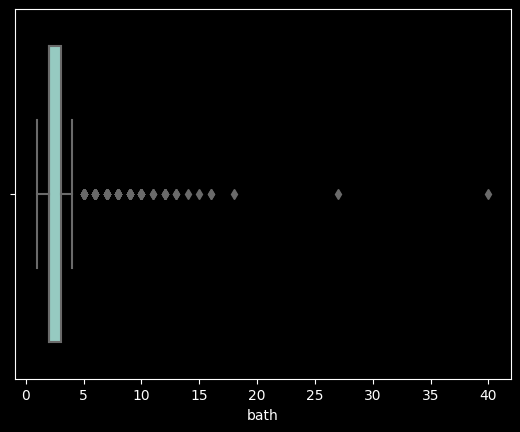

In [70]:
sns.boxplot(x=ban_df["bath"])  # Checking for outliers 

In [71]:
# As the outliers are present in this column , null values in this column are replaced by median()
ban_df["bath"].fillna(ban_df["bath"].median(),inplace=True) 
ban_df["bath"].isna().sum() # Checking Null values for bath column 

0

In [72]:
# For Balcony Column 
ban_df["balcony"].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [73]:
ban_df["balcony"].mean() 

1.5843757375501535

In [74]:
ban_df["balcony"].median() # Checking for median 

2.0

<Axes: xlabel='balcony'>

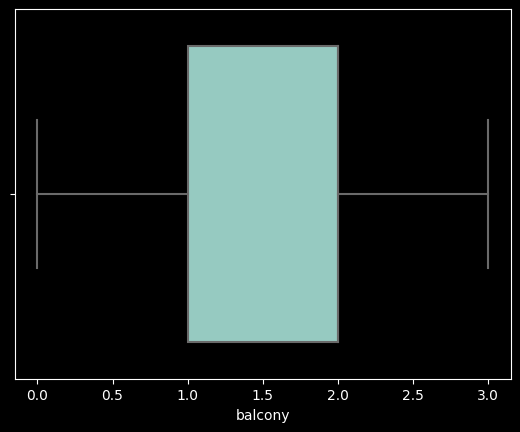

In [75]:
sns.boxplot(x=ban_df["balcony"]) # Checking for outliers

In [76]:
# As this column gives count of balconies which cant be in fraction therefore null values in this column are replaced by median() and not by mean()
ban_df["balcony"].fillna(ban_df["balcony"].median(),inplace=True)
ban_df["balcony"].isna().sum() # Checking Null values for balcony column

0

In [77]:
ban_df.info()  # Checking again there is null values or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [78]:
# area type 
ban_df["area_type"].value_counts() 

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [79]:
ban_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [80]:
ban_df = pd.get_dummies(ban_df , columns=["area_type"],dtype=int)
ban_df

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,1,0,0,0
13316,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,2.0,400.00,0,0,0,1
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,1,0,0,0
13318,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,0,0,0,1


In [81]:
# availability column 
ban_df["availability"].value_counts() 

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [82]:
ban_df["availability"].isna().sum() # Checking Null values for availability column

0

<Axes: xlabel='availability', ylabel='price'>

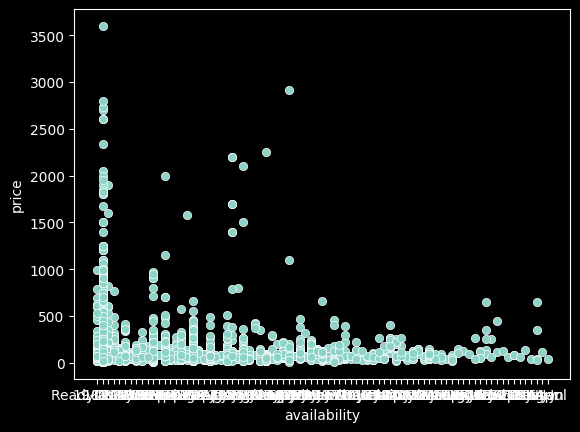

In [84]:
sns.scatterplot(x=ban_df["availability"] , y=ban_df["price"]) # Checking linear relationship between availability and price


<Axes: xlabel='location', ylabel='price'>

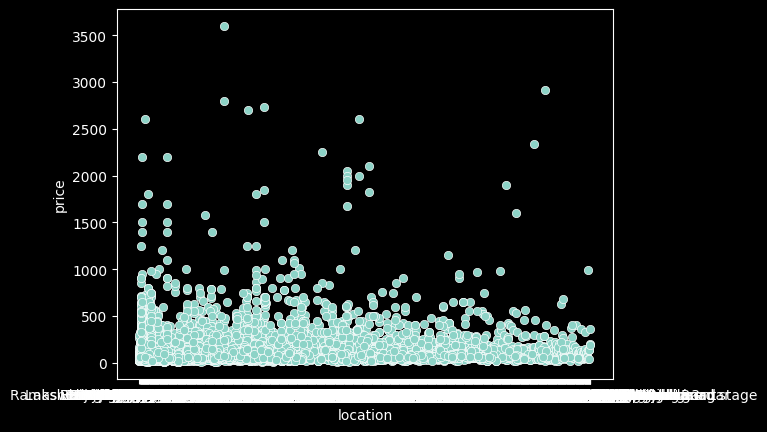

In [85]:
sns.scatterplot(x=ban_df["location"] , y = ban_df["price"]) # Checking linear relationship between location and price column

In [86]:
ban_df["location"].value_counts() # Checking location column

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [87]:
ban_df["size"].value_counts() # Checking size column

size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [88]:
ban_df["total_sqft"].value_counts() # Checking total sqft column

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [89]:
ban_df["total_sqft"].unique() # Checking unique elements for total sqft column

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)